# Итоговая работа.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [3]:
ratings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [4]:
def cosine(x, y):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    len_x = np.linalg.norm(x)
    len_y = np.linalg.norm(y)
    return np.dot(x, y)/(len_x * len_y)

Для наглядности построим таблицу, в которой отразим попарные косинусные расстояния пользователей. Чем ближе к 1 значение косинуса между векторами, тем ближе друг к другу сами вектора. 

In [5]:
similarities = pd.DataFrame(columns = [i for i in range(1, ratings.shape[0]+1)])

for i, user in enumerate(ratings, 1):
    for j in range(1, ratings.shape[0]+1):
        if j == i:
            similarities.loc[i, j] = 1
        else:
            similarities.loc[i, j] = cosine(user, ratings[j-1])

similarities    



,1,2,3,4,5,6,7,8,9,10
1,1,0.826029,0.849215,0.783401,0.819176,0.741185,0.727358,0.809675,0.91066,0.860108
2,0.826029,1,0.812343,0.846353,0.871381,0.827131,0.826297,0.80026,0.825263,0.819681
3,0.849215,0.812343,1,0.846694,0.783943,0.79098,0.676162,0.762896,0.821121,0.918731
4,0.783401,0.846353,0.846694,1,0.691534,0.786658,0.832742,0.829347,0.777067,0.858869
5,0.819176,0.871381,0.783943,0.691534,1,0.776443,0.782005,0.812369,0.879485,0.845748
6,0.741185,0.827131,0.79098,0.786658,0.776443,1,0.740118,0.844517,0.806229,0.855149
7,0.727358,0.826297,0.676162,0.832742,0.782005,0.740118,1,0.826692,0.8113,0.791547
8,0.809675,0.80026,0.762896,0.829347,0.812369,0.844517,0.826692,1,0.798128,0.836822
9,0.91066,0.825263,0.821121,0.777067,0.879485,0.806229,0.8113,0.798128,1,0.900938
10,0.860108,0.819681,0.918731,0.858869,0.845748,0.855149,0.791547,0.836822,0.900938,1


In [6]:
from sklearn.metrics import pairwise_distances

Если импортируем встроенную функцию из sklearn получим аналогичный результат, только в ячейках таблицы вместо значений cosine(x, y) будут значения (1 - cosine(x, y)). Соответственно, если смотреть по этой таблице, то ближайшим соседом вектора х будет вектор с минимальным ненулевым значением

In [7]:
pd.DataFrame(pairwise_distances(ratings, metric='cosine'))

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.173971,0.150785,0.216599,0.180824,0.258815,0.272642,0.190325,0.089340,0.139892
1,0.173971,0.000000,0.187657,0.153647,0.128619,0.172869,0.173703,0.199740,0.174737,0.180319
2,0.150785,0.187657,0.000000,0.153306,0.216057,0.209020,0.323838,0.237104,0.178879,0.081269
3,0.216599,0.153647,0.153306,0.000000,0.308466,0.213342,0.167258,0.170653,0.222933,0.141131
4,0.180824,0.128619,0.216057,0.308466,0.000000,0.223557,0.217995,0.187631,0.120515,0.154252
5,0.258815,0.172869,0.209020,0.213342,0.223557,0.000000,0.259882,0.155483,0.193771,0.144851
6,0.272642,0.173703,0.323838,0.167258,0.217995,0.259882,0.000000,0.173308,0.188700,0.208453
7,0.190325,0.199740,0.237104,0.170653,0.187631,0.155483,0.173308,0.000000,0.201872,0.163178
8,0.089340,0.174737,0.178879,0.222933,0.120515,0.193771,0.188700,0.201872,0.000000,0.099062
9,0.139892,0.180319,0.081269,0.141131,0.154252,0.144851,0.208453,0.163178,0.099062,0.000000


In [8]:
# сформируем ответ, который требуется от нас в задаче в виде пар пользователей, наиболее близких друг к другу
# можно сверить полученный результат с таблицей similarities, чтобы убедиться, что именно для этих пользователей
# косинусное расстояние максимально (но не равно 1)

result_list = []
for col in similarities.columns:
    max_value = max(similarities.loc[:, col][similarities[col]!=1])
    result_list.append((col, similarities[col][similarities[col]==max_value].index.tolist()[0]))

result_list

[(1, 9),
 (2, 5),
 (3, 10),
 (4, 10),
 (5, 9),
 (6, 10),
 (7, 4),
 (8, 6),
 (9, 1),
 (10, 3)]

In [74]:
def highlight_max(s):
    '''
    Подсветить максимальное значение желтым
    '''
    is_max = (s == s[s<1].max())
    return ['background-color: yellow' if v else '' for v in is_max]

similarities.style.apply(highlight_max)

,1,2,3,4,5,6,7,8,9,10
1,1,0.826029,0.849215,0.783401,0.819176,0.741185,0.727358,0.809675,0.910660,0.860108
2,0.826029,1,0.812343,0.846353,0.871381,0.827131,0.826297,0.800260,0.825263,0.819681
3,0.849215,0.812343,1,0.846694,0.783943,0.790980,0.676162,0.762896,0.821121,0.918731
4,0.783401,0.846353,0.846694,1,0.691534,0.786658,0.832742,0.829347,0.777067,0.858869
5,0.819176,0.871381,0.783943,0.691534,1,0.776443,0.782005,0.812369,0.879485,0.845748
6,0.741185,0.827131,0.790980,0.786658,0.776443,1,0.740118,0.844517,0.806229,0.855149
7,0.727358,0.826297,0.676162,0.832742,0.782005,0.740118,1,0.826692,0.811300,0.791547
8,0.809675,0.800260,0.762896,0.829347,0.812369,0.844517,0.826692,1,0.798128,0.836822
9,0.910660,0.825263,0.821121,0.777067,0.879485,0.806229,0.811300,0.798128,1,0.900938
10,0.860108,0.819681,0.918731,0.858869,0.845748,0.855149,0.791547,0.836822,0.900938,1


Чтобы сжать признаковые описания фильма с 15 признаков до 5, можно воспользоваться методом главных компонент (PCA)

In [9]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [10]:
pca=PCA(5, random_state=146)
pca.fit(ratings)
X_proj = pca.transform(ratings)
X_pred = pca.inverse_transform(X_proj)
print(f'mse: {mean_squared_error(X_pred, ratings)}')
print(f'explained variance: {round(np.sum(pca.explained_variance_ratio_)*100, 2)}')

mse: 1.2455442696728187
explained variance: 83.44


5-ю признаков из 15 объяснены 83.44% исходной дисперсии. Чтобы решить, достаточно ли такой точности, следует исходить из особенностей задания. Но в целом по общим соображениям это неплохой результат.

In [11]:
# вектора, сжатые до 5 признаков
X_proj

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

Можно воспользоваться другим алгоритмом для уменьшения размерности - TruncatedSVD. Однако в этом случае сжатие до 5 признаков объясняет только 76.35% исходной дисперсии, что заметно меньше, чем в результате, показанном PCA 

In [12]:
from sklearn.decomposition import TruncatedSVD

In [13]:
svd = TruncatedSVD(n_components=5, random_state=146)
svd.fit(ratings)
X_proj_svd = svd.transform(ratings)
X_pred_svd = svd.inverse_transform(X_proj_svd)
print(f'mse: {mean_squared_error(X_pred_svd, ratings)}')
print(f'explained variance: {round(np.sum(svd.explained_variance_ratio_)*100, 2)}')

mse: 1.782006084929767
explained variance: 76.35


In [14]:
X_proj_svd

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [15]:
from sympy import *

In [16]:
x, y = symbols('x y') 
expression = (tan(sin(x) + cos(2*x+3)))**2
d1 = diff(expression, x)
print(expression)
print(d1)


tan(sin(x) + cos(2*x + 3))**2
2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [17]:
from scipy.misc import derivative

In [18]:
def f(x):
    return (np.tan(np.sin(x) + np.cos(2*x+3)))**2
derivative(f, 1.0, dx=1e-6)

55.3859176464222

Решение вручную:

<img src="task2.jpg">

Результат получен аналогичный

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [19]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [20]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [21]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

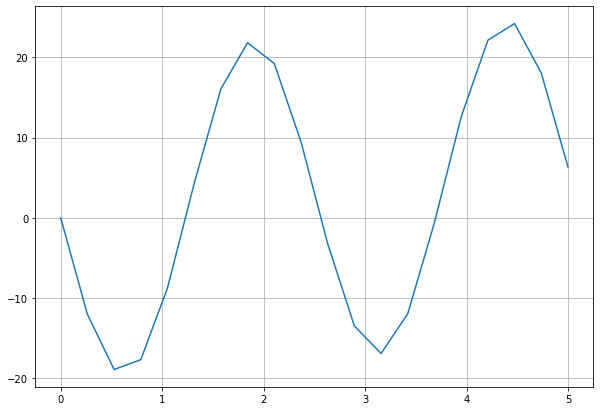

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(x, fx)
plt.grid()
plt.show()

In [23]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [24]:
from scipy.optimize import minimize
from scipy.optimize import differential_evolution

In [25]:
bounds = [(-10, 10), (-10, 10)]
res = differential_evolution(error, bounds, seed=146)
res

     fun: 1.5115933038600815e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

In [26]:
a = 3
b = -2.5

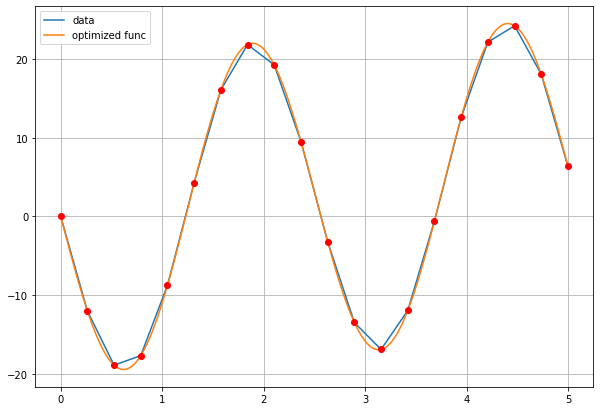

In [27]:
x_new = np.linspace(0, 5, 200)
plt.figure(figsize=(10, 7))
plt.plot(x, fx,label='data')
plt.plot(x_new, f(x_new, a, b), label='optimized func')
plt.plot(x, fx, 'o', color='r')
plt.legend()
plt.grid()
plt.show()

При параметрах a, b = [ 3. , -2.5] ошибка будет минимальной. Графики полученной функции и исходных данных фактически накладываются друг на друга

In [35]:
res2 = minimize(error, np.array([0, 0]), method='COBYLA')
res2

     fun: 0.0767456611156554
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

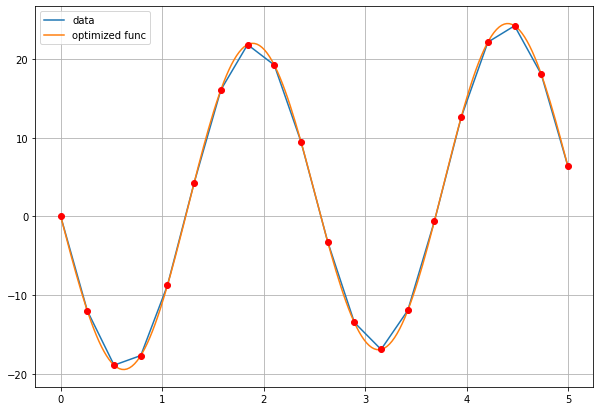

In [36]:
a = 3.00018796
b = -2.50008926
x_new = np.linspace(0, 5, 200)
plt.figure(figsize=(10, 7))
plt.plot(x, fx,label='data')
plt.plot(x_new, f(x_new, a, b), label='optimized func')
plt.plot(x, fx, 'o', color='r')
plt.legend()
plt.grid()
plt.show()

Похожий результат получим с помощью функции minimize из scipy.optimize

## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [37]:
# Создадим дискретную случайную величину с 20 значениями
random_value = np.random.randint(low=1, high=1001, size=20)
random_value

array([961, 337, 820,  71, 932, 640, 505, 862,  47, 414, 182, 312, 306,
       924, 171, 282, 969, 836,  92, 839])

In [57]:
# Сделаем сэмплы исходной СВ 1000 раз
# параметр р оставим по умолчанию None, пусть элементы random_value могут оказаться в сэмпле с одинаковой вероятностью

mean_list = []
for i in range(1000):
    sampling = np.random.choice(random_value, 50)
    mean_list.append(np.mean(sampling))


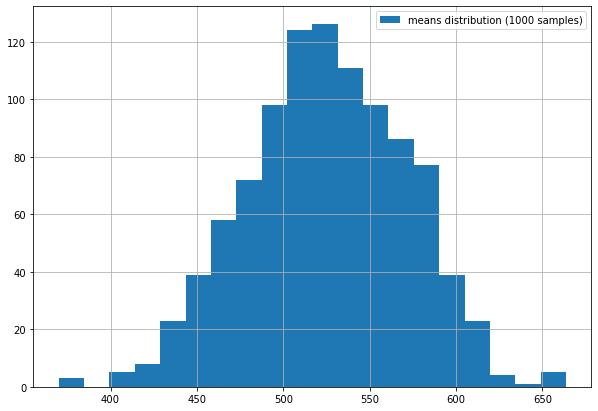

In [58]:
plt.figure(figsize = (10, 7))
plt.hist(mean_list, bins=20, label='means distribution (1000 samples)')
plt.grid()
plt.legend()
plt.show()

Получили распределение, внешне похожее на нормальное распределение.
Если мы возьмем большее количество выборок, то распределение их средних будет еще ближе к нормальному. Ниже привожу пример для 10000 выборок по 50 значений из исходной случайной величины 

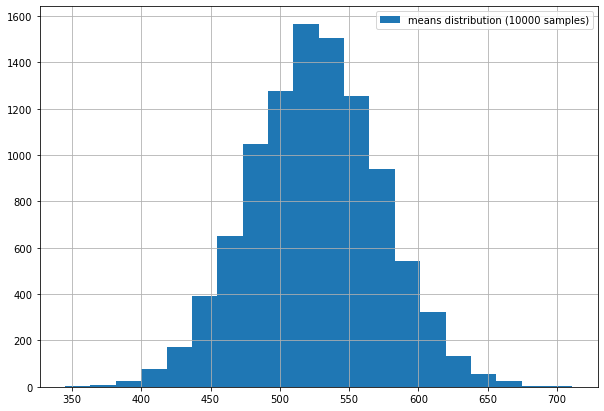

In [59]:
mean_list = []
for i in range(10000):
    sampling = np.random.choice(random_value, 50)
    mean_list.append(np.mean(sampling))
    
plt.figure(figsize = (10, 7))
plt.hist(mean_list, bins=20, label='means distribution (10000 samples)')
plt.grid()
plt.legend()
plt.show()

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):



```
m = np.array([[1, 4],
              [1, 1]])
print(m)
```



In [60]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [64]:
w, v = np.linalg.eig(m)
for i in range(len(w)):
    print("Собственное значение " + str(round(w[i], 4)))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]


Решение вручную:

<img src="task5.jpg">

Результат получен аналогичный